In [4]:
import pandas as pd 
df = pd.read_csv("prediksi_pengunjung_borobudur.csv")
df

,hari_type,musim,suhu_rata_rata,ada_event_budaya,harga_tiket_ribu,jumlah_pengunjung
0,weekend,hujan,29.1,ya,86.8,37158
1,weekday,kemarau,22.3,tidak,98.9,25140
2,weekday,kemarau,29.4,ya,71.9,43760
3,weekend,kemarau,30.4,tidak,99.9,32368
4,weekday,kemarau,22.6,tidak,83.3,21171
...,...,...,...,...,...,...
295,weekday,hujan,26.9,ya,98.5,26379
296,weekday,kemarau,33.5,ya,93.0,32794
297,weekday,kemarau,24.8,tidak,85.7,21562
298,weekend,kemarau,25.6,tidak,78.4,31919


In [5]:
df.shape

(300, 6)

In [6]:
df.columns

Index(['hari_type', 'musim', 'suhu_rata_rata', 'ada_event_budaya',
       'harga_tiket_ribu', 'jumlah_pengunjung'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hari_type          300 non-null    object 
 1   musim              300 non-null    object 
 2   suhu_rata_rata     300 non-null    float64
 3   ada_event_budaya   300 non-null    object 
 4   harga_tiket_ribu   300 non-null    float64
 5   jumlah_pengunjung  300 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 14.2+ KB


In [8]:
df.dtypes

hari_type             object
musim                 object
suhu_rata_rata       float64
ada_event_budaya      object
harga_tiket_ribu     float64
jumlah_pengunjung      int64
dtype: object

In [9]:
df.describe

<bound method NDFrame.describe of     hari_type    musim  suhu_rata_rata ada_event_budaya  harga_tiket_ribu  \
0     weekend    hujan            29.1               ya              86.8   
1     weekday  kemarau            22.3            tidak              98.9   
2     weekday  kemarau            29.4               ya              71.9   
3     weekend  kemarau            30.4            tidak              99.9   
4     weekday  kemarau            22.6            tidak              83.3   
..        ...      ...             ...              ...               ...   
295   weekday    hujan            26.9               ya              98.5   
296   weekday  kemarau            33.5               ya              93.0   
297   weekday  kemarau            24.8            tidak              85.7   
298   weekend  kemarau            25.6            tidak              78.4   
299   weekday  kemarau            25.0            tidak              52.6   

     jumlah_pengunjung  
0               

In [10]:
df.head()

,hari_type,musim,suhu_rata_rata,ada_event_budaya,harga_tiket_ribu,jumlah_pengunjung
0,weekend,hujan,29.1,ya,86.8,37158
1,weekday,kemarau,22.3,tidak,98.9,25140
2,weekday,kemarau,29.4,ya,71.9,43760
3,weekend,kemarau,30.4,tidak,99.9,32368
4,weekday,kemarau,22.6,tidak,83.3,21171


In [11]:
df.tail()

,hari_type,musim,suhu_rata_rata,ada_event_budaya,harga_tiket_ribu,jumlah_pengunjung
295,weekday,hujan,26.9,ya,98.5,26379
296,weekday,kemarau,33.5,ya,93.0,32794
297,weekday,kemarau,24.8,tidak,85.7,21562
298,weekend,kemarau,25.6,tidak,78.4,31919
299,weekday,kemarau,25.0,tidak,52.6,26931


In [12]:
df.sample()

,hari_type,musim,suhu_rata_rata,ada_event_budaya,harga_tiket_ribu,jumlah_pengunjung
139,weekend,kemarau,22.7,tidak,51.1,27823


In [13]:
df["musim"].value_counts()

musim
kemarau    172
hujan      128
Name: count, dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.isna().sum()

hari_type            0
musim                0
suhu_rata_rata       0
ada_event_budaya     0
harga_tiket_ribu     0
jumlah_pengunjung    0
dtype: int64

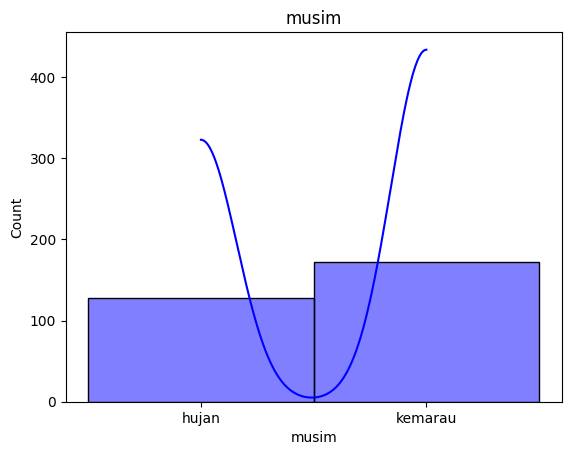

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["musim"], kde=True, color="blue")
plt.title("musim")
plt.show()

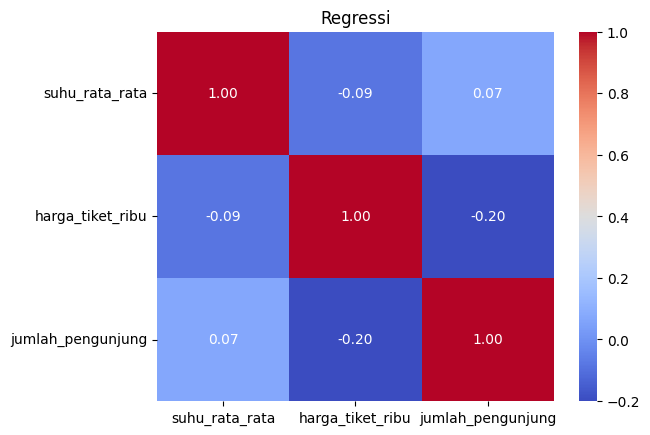

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

kolom_angka = ['suhu_rata_rata', 'harga_tiket_ribu', 'jumlah_pengunjung']

sns.heatmap (df[kolom_angka].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Regressi")
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["hari_type","musim","suhu_rata_rata","ada_event_budaya","jumlah_pengunjung"]]
y = df["harga_tiket_ribu"]

X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ("suhu_rata_rata","jumlah_pengunjung")
categorical_columns = ("hari_type","musim","ada_event_budaya")

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(),numeric_columns),
        ("ohe", OneHotEncoder(),categorical_columns)
    ]
)

model_linear=Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", LinearRegression())
    ]
)

model_linear.fit(X_train, y_train)
y_pred=model_linear.predict(X_test)

print("R2 Score :", r2_score(y_test,y_pred))
print("MAE : ", mean_absolute_error(y_test,y_pred))
print("MSE : ", mean_squared_error(y_test,y_pred))

R2 Score : 0.2226127340762043
MAE :  11.900590944329503
MSE :  183.37308611121526


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["hari_type","musim","suhu_rata_rata","ada_event_budaya","jumlah_pengunjung"]]
y = df["harga_tiket_ribu"]

X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ("suhu_rata_rata","jumlah_pengunjung")
categorical_columns = ("hari_type","musim","ada_event_budaya")

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(),numeric_columns),
        ("ohe", OneHotEncoder(),categorical_columns)
    ]
)

model_tree=Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", DecisionTreeRegressor())
    ]
)

model_tree.fit(X_train, y_train)
y_pred=model_tree.predict(X_test)

print("R2 Score :", r2_score(y_test,y_pred))
print("MAE : ", mean_absolute_error(y_test,y_pred))
print("MSE : ", mean_squared_error(y_test,y_pred))

R2 Score : -1.0438224423064932
MAE :  17.650000000000002
MSE :  482.10466666666656


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["hari_type","musim","suhu_rata_rata","ada_event_budaya","jumlah_pengunjung"]]
y = df["harga_tiket_ribu"]

X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ("suhu_rata_rata","jumlah_pengunjung")
categorical_columns = ("hari_type","musim","ada_event_budaya")

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(),numeric_columns),
        ("ohe", OneHotEncoder(),categorical_columns)
    ]
)

model_forest=Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", RandomForestRegressor())
    ]
)

model_forest.fit(X_train, y_train)
y_pred=model_forest.predict(X_test)

print("R2 Score :", r2_score(y_test,y_pred))
print("MAE : ", mean_absolute_error(y_test,y_pred))
print("MSE : ", mean_squared_error(y_test,y_pred))

R2 Score : -0.19624790524535474
MAE :  14.42378333333334
MSE :  282.1755381833336


In [22]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(model_linear, X_train, y_train, cv=5, scoring="r2")
print("Scores :", scores)
print("Mean Score :",scores.mean())

Scores : [0.13827644 0.05907662 0.21660129 0.29670891 0.16044274]
Mean Score : 0.1742212004157327


In [23]:
import joblib

joblib.dump(model_linear, "model_linear.joblib")

['model_linear.joblib']

In [24]:
import joblib
model_linear=joblib.load("model_linear.joblib")
data_baru=pd.DataFrame([["weekend","hujan",22.3,"ya",87,37158]],columns=["hari_type","musim","suhu_rata_rata","ada_event_budaya","harga_tiket_ribu","jumlah_pengunjung"])
prediksi=model_linear.predict(data_baru)[0]
print(f"model meprediksi {prediksi:.2f}")

model meprediksi 74.51
